<font size = "5">1. Python tokenizer that filters out punctuations and unicodes and wraps all words to lower-case.</font>

In [1]:
import string

wdict = {}
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()

    # These 4 lines of codes removes the punctuations and unicodes from the string.
    out = line.translate(str.maketrans("","", string.punctuation))
    string_encode = out.encode("ascii", "ignore")
    string_decode = string_encode.decode()
    line = string_decode

    nlines = 1
    while line:

        words = line.split()
        for word in words:
            #Concert all the characters in a word to lowercase.
            word = word.lower()
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

#Sort the dictionary wdict according to the descending order of frequency and return a list sorted_wdict.
sorted_wdict = sorted(wdict.items(), key=lambda x:x[1], reverse=True)
#Convert the list sorted_wdict to a dictionary.
sorted_wdict = dict(sorted_wdict)

nitem = 0 ; maxitems = 100
for item in sorted_wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break

('the', 9197)
('and', 5843)
('of', 4505)
('a', 4000)
('to', 3542)
('in', 2519)
('i', 2092)
('was', 2022)
('it', 1723)
('that', 1612)
('he', 1349)
('is', 1081)
('with', 1063)
('for', 1060)
('his', 956)
('had', 952)
('but', 925)
('you', 911)
('on', 886)
('as', 864)
('they', 744)
('at', 735)
('this', 721)
('not', 702)
('by', 672)
('all', 661)
('one', 618)
('were', 610)
('be', 597)
('or', 569)
('my', 569)
('from', 565)
('have', 559)
('we', 507)
('when', 491)
('there', 486)
('so', 469)
('would', 469)
('which', 464)
('out', 451)
('an', 436)
('up', 430)
('their', 377)
('are', 366)
('if', 365)
('no', 352)
('me', 339)
('then', 331)
('been', 327)
('him', 322)
('about', 318)
('could', 300)
('has', 298)
('into', 297)
('river', 297)
('them', 295)
('will', 291)
('its', 278)
('down', 273)
('some', 263)
('two', 258)
('what', 254)
('new', 246)
('said', 237)
('her', 233)
('other', 231)
('any', 227)
('these', 227)
('she', 227)
('time', 226)
('got', 225)
('who', 215)
('do', 214)
('it.', 206)
('it,', 200)


<font size = "5">2. Token embedding visualization by selecting a smaller set of words and attached a zoomed in portion of the PDF output file.</font>

In [2]:
# Administrivia: modify this notebook so output text wraps.
from IPython.display import HTML, display
def set_css():
  display(HTML('''
  <style>
    pre {
      white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
%pip install transformers

In [3]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import sys
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['figure.figsize'] = [100, 60]

# Load BERT.
model = BertModel.from_pretrained('bert-large-uncased-whole-word-masking')
# Set the model to eval mode.
model.eval()
# This notebook assumes CPU execution. If you want to use GPUs, put the model on cuda and modify subsequent code blocks.
#model.to('cuda')
# Load tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking')

# Save the BERT vocabulary to a file -- by default it will name this file "vocab.txt".
tokenizer.save_vocabulary(save_directory='.')

print(model.config.vocab_size) # Size of the vocabulary


2024-03-03 19:30:04.172568: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/soft/datascience/conda/2023-01-10/mconda3/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
Some weights of the model checkpoint at bert-large-uncased-whole-word-masking were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.tra

30522


In [4]:
# Get BERT's vocabulary embeddings.
wordembs = model.get_input_embeddings()

# Convert the vocabulary embeddings to numpy.
allinds = np.arange(0,model.config.vocab_size,1)
inputinds = torch.LongTensor(allinds)
bertwordembs = wordembs(inputinds).detach().numpy()
print(bertwordembs.shape)


(30522, 1024)


In [5]:
# Read in the vocabulary
filename = "vocab.txt"
with open(filename,'r') as f:
    bertwords = np.array([])
    for line in f:
        bertwords = np.append(bertwords, line.rstrip())

# Determine vocabulary to use for t-SNE/visualization. The indices are hard-coded based partially on inspection:
bert_char_indices_to_use = np.arange(999, 1063, 1)
bert_voc_indices_to_plot = np.append(bert_char_indices_to_use, np.arange(2500, 3500, 1))
bert_voc_indices_to_use = np.append(bert_char_indices_to_use, np.arange(2500, 4500, 1))

bert_voc_indices_to_use_tensor = torch.LongTensor(bert_voc_indices_to_use)
bert_word_embs_to_use = wordembs(bert_voc_indices_to_use_tensor).detach().numpy()
bert_words_to_plot = bertwords[bert_voc_indices_to_plot]


print(len(bert_voc_indices_to_plot))
print(len(bert_voc_indices_to_use))

1064
2064


In [6]:
# Run t-SNE on the BERT vocabulary embeddings we selected:
mytsne_words = TSNE(n_components=2,early_exaggeration=12,verbose=2,metric='cosine',init='pca',n_iter=2500)
bert_word_embs_to_use_tsne = mytsne_words.fit_transform(bert_word_embs_to_use)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2064 samples in 0.001s...
[t-SNE] Computed neighbors for 2064 samples in 0.071s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2064
[t-SNE] Computed conditional probabilities for sample 2000 / 2064
[t-SNE] Computed conditional probabilities for sample 2064 / 2064
[t-SNE] Mean sigma: 0.292518
[t-SNE] Computed conditional probabilities in 0.038s
[t-SNE] Iteration 50: error = 79.3863602, gradient norm = 0.0099424 (50 iterations in 0.113s)
[t-SNE] Iteration 100: error = 78.4303055, gradient norm = 0.0000802 (50 iterations in 0.111s)
[t-SNE] Iteration 150: error = 78.4269104, gradient norm = 0.0000349 (50 iterations in 0.110s)
[t-SNE] Iteration 200: error = 78.4265366, gradient norm = 0.0000243 (50 iterations in 0.110s)
[t-SNE] Iteration 250: error = 78.4264145, gradient norm = 0.0000200 (50 iterations in 0.111s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.426414
[t-SNE] Iteration 300: erro

<function matplotlib.pyplot.show(close=None, block=None)>

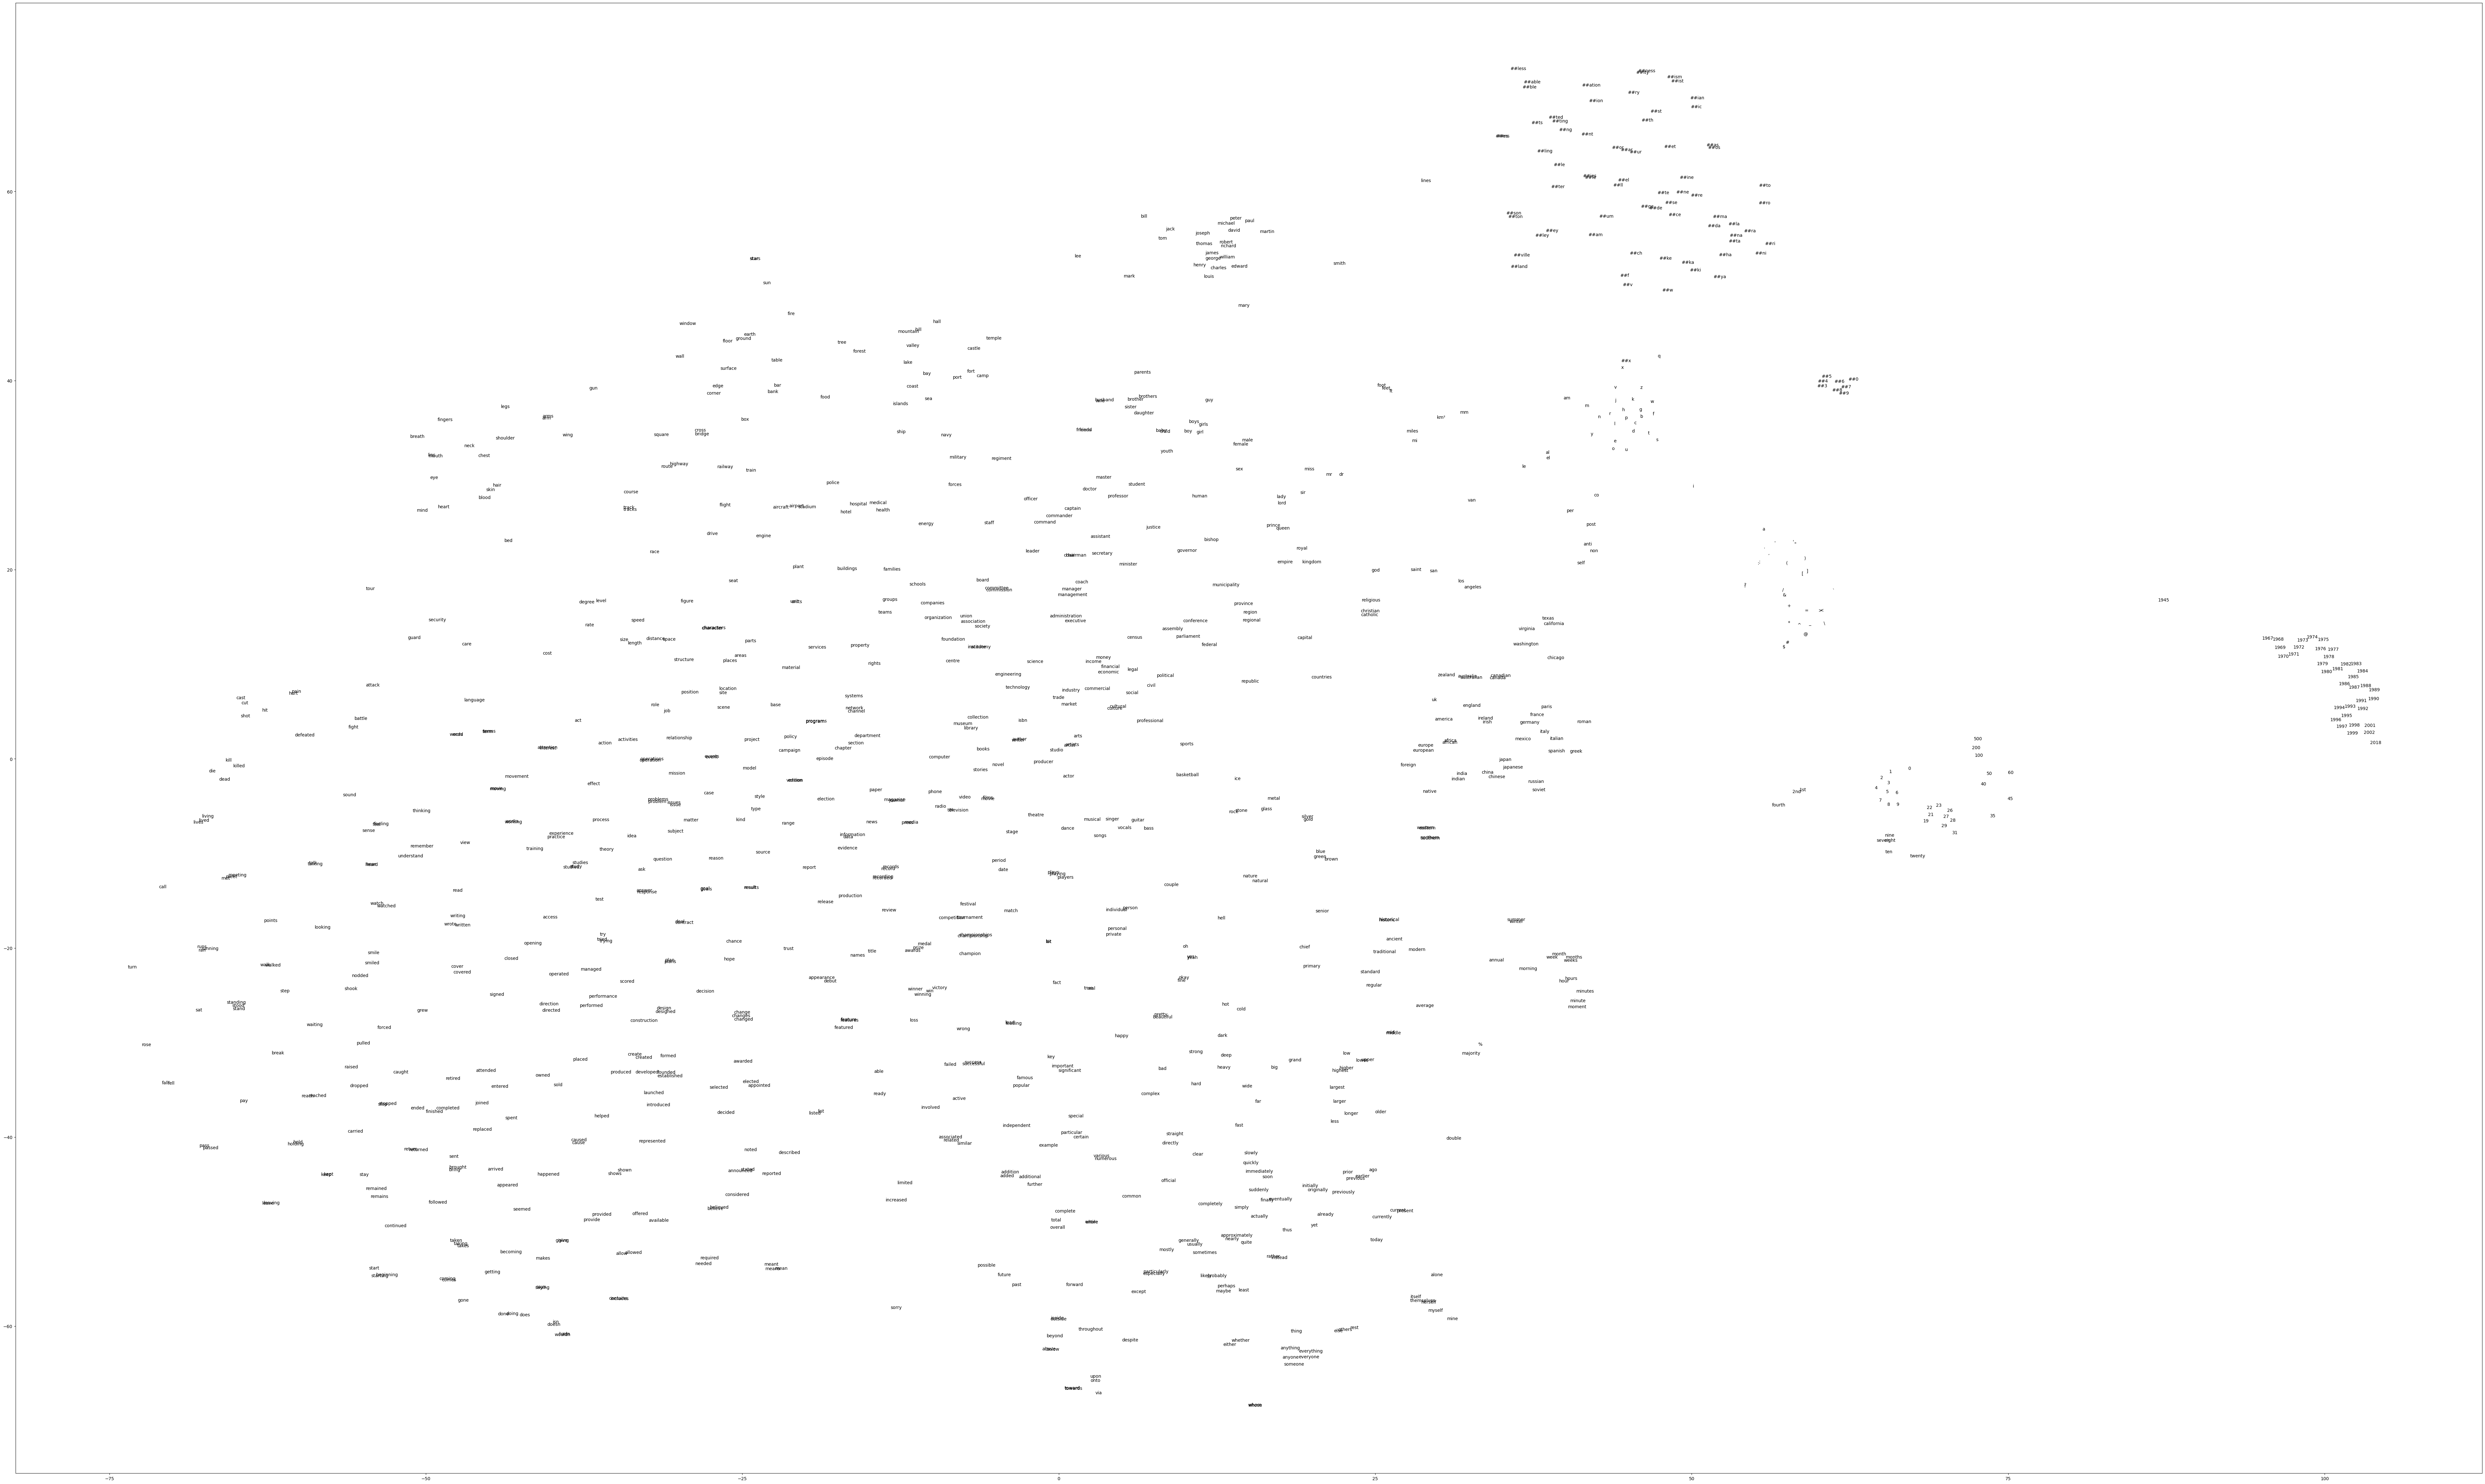

In [7]:
# Plot the transformed BERT vocabulary embeddings:
fig = plt.figure()
alltexts = list()
for i, txt in enumerate(bert_words_to_plot):
    plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], s=0)
    currtext = plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt, family='sans-serif')
    alltexts.append(currtext)
    

# Save the plot before adjusting.
plt.savefig('2-27-2024-AlfredTang-session4-embedding.pdf', format='pdf')

plt.show

Here is a zoomed in portion of the output:
    
![alternative text](2-27-2024-AlfredTang-session3-output-zoom-in.png)